In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_directory = '/content/drive/My Drive/Colab Notebooks/data2'
bike_trips = pd.read_csv(f'{data_directory}/combined_bike_trips_2023.csv')
stations = pd.read_csv(f'{data_directory}/manhattan_stations.csv')

            ride_id  rideable_type               started_at  \
0  DC1CB984821DFFF7   classic_bike   2023-01-07 15:36:53.43   
1  C00CA02971557F16   classic_bike  2023-01-04 19:23:01.234   
2  E4415A543C1972A7   classic_bike  2023-01-24 10:38:01.135   
3  4FC76B63F9FE631F   classic_bike    2023-01-26 19:17:23.2   
4  153486234EA3E427  electric_bike  2023-01-10 08:29:04.191   

                  ended_at       start_station_name  start_station_id  \
0  2023-01-07 15:39:45.406     Vesey St & Church St           5216.06   
1  2023-01-04 19:34:57.151  Lispenard St & Broadway           5391.06   
2  2023-01-24 10:41:40.749           E 5 St & Ave A           5626.06   
3  2023-01-26 19:47:05.287         W 59 St & 10 Ave           7023.04   
4  2023-01-10 08:33:49.274    Barrow St & Hudson St           5805.05   

                end_station_name  end_station_id  start_lat  start_lng  \
0       Albany St & Greenwich St         5145.02  40.712220 -74.010472   
1            St Marks Pl & 1 Ave  

In [4]:
bike_df = bike_trips.copy()

In [ ]:
# Convert string to datetime objects
bike_df['started_at'] = pd.to_datetime(bike_df['started_at'], format='mixed')
bike_df['ended_at'] = pd.to_datetime(bike_df['ended_at'], format='mixed')

# Get trip_duration
bike_df['trip_duration'] = (bike_df['ended_at'] - bike_df['started_at']).dt.total_seconds()/60
bike_df = bike_df[bike_df['trip_duration'] > 0].copy() # ensure start_date is before end_date

# Get month for each observation
bike_df['month_started'] = bike_df['started_at'].dt.month
bike_df['month_ended'] = bike_df['ended_at'].dt.month

In [ ]:
# bike_df.head(10)
bike_df.describe()

,started_at,ended_at,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng,trip_duration,hour_started,hour_ended,day_of_week_started,day_of_week_ended,week_started,week_ended,month_started,month_ended
count,10823892,10823892,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,1.082389e+07,10823892.0,10823892.0,1.082389e+07,1.082389e+07
mean,2023-07-03 03:26:57.908550656,2023-07-03 03:40:37.026585088,6.316388e+03,6.309301e+03,4.074922e+01,-7.398563e+01,4.074896e+01,-7.398572e+01,1.365197e+01,1.398092e+01,1.411836e+01,2.858058e+00,2.859069e+00,26.597953,26.597947,6.556420e+00,6.556530e+00
min,2023-01-01 00:00:29.074000,2023-01-01 00:02:37.473000,4.846010e+03,4.846010e+03,4.070122e+01,-7.401713e+01,4.070122e+01,-7.401713e+01,1.000300e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,1.0,1.000000e+00,1.000000e+00
25%,2023-04-22 19:41:12.312499968,2023-04-22 19:57:48.770499840,5.721010e+03,5.712030e+03,4.072885e+01,-7.399852e+01,4.072855e+01,-7.399879e+01,5.073017e+00,1.000000e+01,1.000000e+01,1.000000e+00,1.000000e+00,16.0,16.0,4.000000e+00,4.000000e+00
50%,2023-07-03 18:13:56.284000,2023-07-03 18:29:31.877499904,6.257030e+03,6.233050e+03,4.074526e+01,-7.398848e+01,4.074488e+01,-7.398848e+01,8.838150e+00,1.500000e+01,1.500000e+01,3.000000e+00,3.000000e+00,27.0,27.0,7.000000e+00,7.000000e+00
75%,2023-09-14 15:30:47.891500032,2023-09-14 15:44:12.339249920,6.830020e+03,6.824070e+03,4.076472e+01,-7.397739e+01,4.076395e+01,-7.397739e+01,1.534913e+01,1.800000e+01,1.800000e+01,4.000000e+00,4.000000e+00,37.0,37.0,9.000000e+00,9.000000e+00
max,2023-12-31 23:54:38.810000,2023-12-31 23:59:40.267000,8.732040e+03,8.732040e+03,4.087305e+01,-7.391150e+01,4.087305e+01,-7.391150e+01,8.055063e+03,2.300000e+01,2.300000e+01,6.000000e+00,6.000000e+00,52.0,52.0,1.200000e+01,1.200000e+01
std,NaN,NaN,7.532520e+02,7.523539e+02,2.724650e-02,1.778631e-02,2.714937e-02,1.780030e-02,3.427919e+01,4.932795e+00,4.977484e+00,1.914719e+00,1.915413e+00,13.195117,13.195144,3.036456e+00,3.036485e+00


In [ ]:
# Extract the Autumn Season Months (September, October, November)
autumn_bike_df = bike_df[bike_df['month_started'].isin([9, 10, 11]) & bike_df['month_ended'].isin([9, 10, 11])].copy()

In [ ]:
# Verify extracted months are 9, 10, 11
autumn_bike_df['month_started'].unique()
autumn_bike_df['month_ended'].unique()

array([ 9, 10, 11], dtype=int32)

In [ ]:
# Calculate the mean weekly trips for each stations
mean_weekly_trips = autumn_bike_df.groupby(['start_station_id', 'week_started']).size().groupby(level=0).mean()
mean_weekly_trips = mean_weekly_trips.reset_index(name='MEAN_WEEKLY_TRIPS')
mean_weekly_trips['MEAN_WEEKLY_TRIPS'] = mean_weekly_trips['MEAN_WEEKLY_TRIPS'].astype(int)

In [ ]:
# Glimpse at the values
mean_weekly_trips

,start_station_id,MEAN_WEEKLY_TRIPS
0,4846.01,313
1,4889.06,248
2,4920.13,27
3,4953.04,405
4,4962.01,241
...,...,...
600,8679.03,11
601,8696.05,4
602,8715.01,17
603,8715.06,14


In [ ]:
# Add mean weekly trips of each station to the stations data set
merged_df = pd.merge(stations, mean_weekly_trips, left_on='station_id', right_on='start_station_id', how='left')
# Drop the stations without a value, in this case, NA for mean_weekly_trips
merged_df.dropna(inplace=True)

In [ ]:
final_df = merged_df.copy()
print(final_df[['station_id', 'MEAN_WEEKLY_TRIPS', 'capacity']].isnull().sum())

station_id           0
MEAN_WEEKLY_TRIPS    0
capacity             0
dtype: int64


In [ ]:
# Step 1: Min-max normalize the 'capacity' column
min_capacity = final_df['capacity'].min()
max_capacity = final_df['capacity'].max()

final_df['NORMALISED_CAPACITY'] = (final_df['capacity'] - min_capacity) / (max_capacity - min_capacity)

# Step 2: Calculate the demand score (N) for each station
small_constant = 0.001

# Demand score = mean * (1 - relative_capacity + e)
final_df['DEMAND_SCORE'] = final_df['MEAN_WEEKLY_TRIPS'] * (1 - final_df['NORMALISED_CAPACITY'] + small_constant)
final_df['DEMAND_SCORE'].describe()

,DEMAND_SCORE
count,605.000000
mean,182.614552
std,134.695575
min,0.522000
25%,66.824333
50%,167.356000
75%,270.405000
max,780.824333


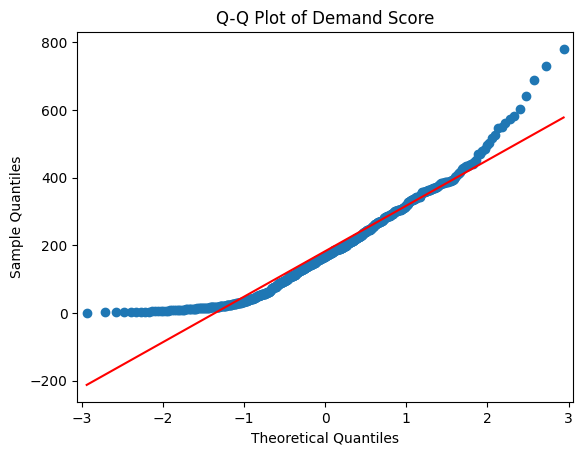

In [ ]:
import statsmodels.api as sm

# Create the Q-Q plot
fig = sm.qqplot(final_df['DEMAND_SCORE'], line='s') # 's' for standardized line
plt.title('Q-Q Plot of Demand Score')
plt.show()

# HOW TO READ:
# If the data points fall along the red line, you can say that the distribution of the demand score is follows a normal distribution.
# If that is the case, a quantile categorisation will be suitable
# In our case, there are some mismatch, so I chose K-Means

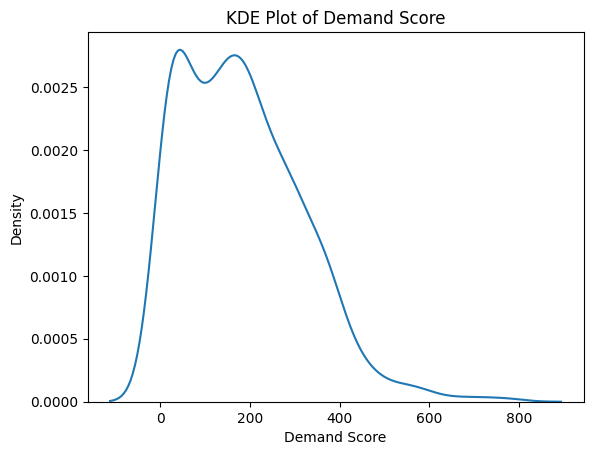

In [ ]:
import seaborn as sns

sns.kdeplot(final_df['DEMAND_SCORE'])
plt.xlabel('Demand Score')
plt.ylabel('Density')
plt.title('KDE Plot of Demand Score')
plt.show()

# HOW TO READ:
# Just a smooth curve to see the distribution

In [ ]:
from sklearn.cluster import KMeans

# Do a K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters= num_clusters, random_state=42)
final_df['DEMAND_CATEGORY'] = kmeans.fit_predict(final_df[['DEMAND_SCORE']])

In [ ]:
final_df['DEMAND_CATEGORY'].value_counts()

,count
DEMAND_CATEGORY,
0,216
3,201
2,158
1,30


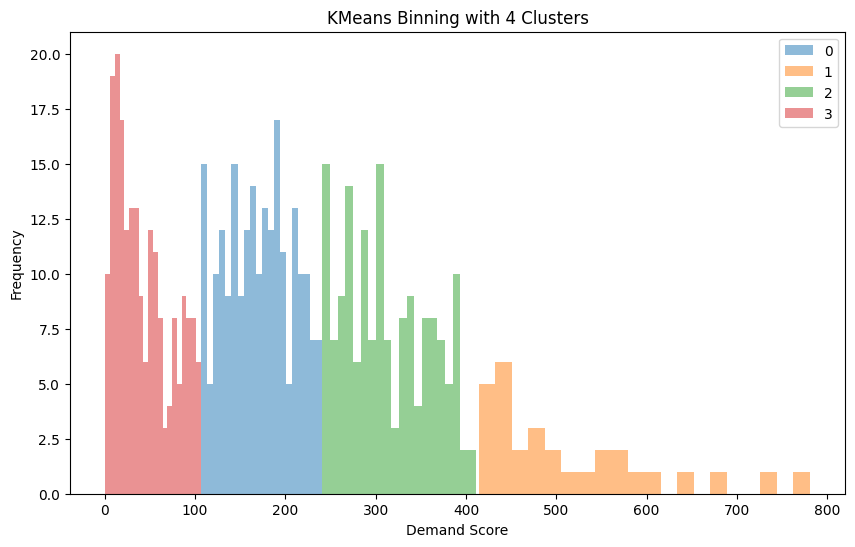

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.hist(final_df.loc[final_df['DEMAND_CATEGORY'] == cluster, 'DEMAND_SCORE'],
              bins=20, alpha=0.5, label=f'{cluster}')
plt.xlabel('Demand Score')
plt.ylabel('Frequency')
plt.title(f'KMeans Binning with {num_clusters} Clusters')
plt.legend()
plt.show()

In [ ]:
# Create a dictionary to map cluster labels to category names
# assign according to the cluster numbers on the chart
cluster_mapping = {
    3: 'Lowest', 
    0: 'Low',
    2: 'Medium',
    1: 'Highest'
}

# Rename the categories in your DataFrame
final_df['DEMAND_CATEGORY'] = final_df['DEMAND_CATEGORY'].map(cluster_mapping)

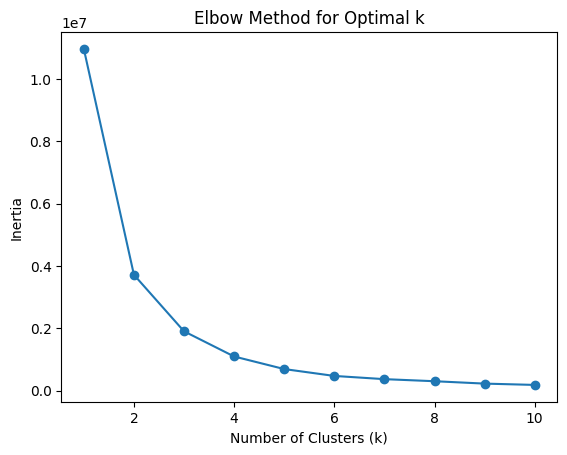

In [ ]:
# Confirmation of K Values
# Use the Elbow Method to see if number of clusters is suitable
# Results show K = 3 or K = 4 as suitable.


def find_optimal_k(df, max_k=10):
    """Finds the optimal k using the elbow method."""
    inertia = []
    
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df[['DEMAND_SCORE']])
        inertia.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(1, max_k + 1), inertia, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.show()

# Run the function to find the optimal k
find_optimal_k(final_df)

# HOW TO READ
# Look for drop in inertia as K value increases
# We want a reasonably high K value.
# Around K = 3 or 4, there is a significant drop in inertia.

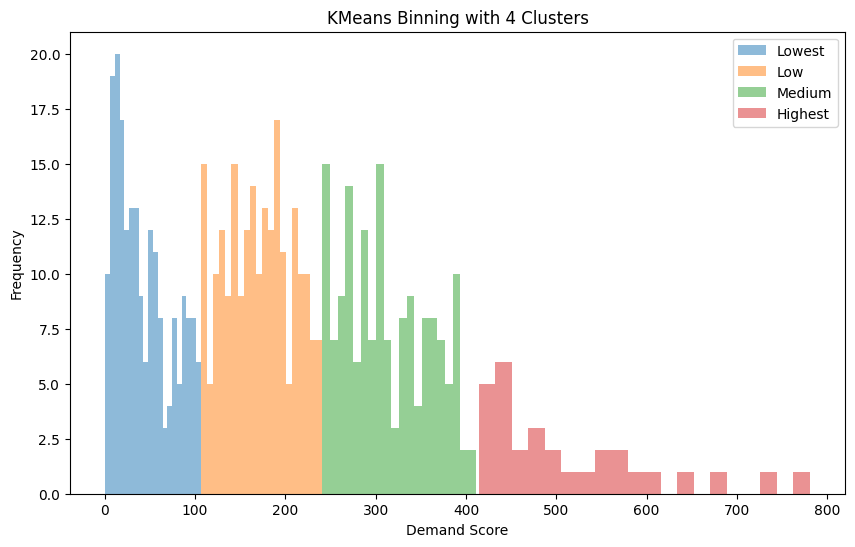

In [ ]:
plt.figure(figsize=(10, 6))
for cluster in ['Lowest','Low','Medium','Highest']:
    plt.hist(final_df.loc[final_df['DEMAND_CATEGORY'] == cluster, 'DEMAND_SCORE'],
              bins=20, alpha=0.5, label=f'{cluster}')
plt.xlabel('Demand Score')
plt.ylabel('Frequency')
plt.title(f'KMeans Binning with {num_clusters} Clusters')
plt.legend()
plt.show()

In [ ]:
# Make sure mean weekly trips is an integer
final_df['MEAN_WEEKLY_TRIPS'] = final_df['MEAN_WEEKLY_TRIPS'].astype(int)

# Write to file
final_df.to_csv('station_with_demand.csv', index=False)